<a href="https://colab.research.google.com/github/edgaracabral/pod-academy-curso-da-ds/blob/main/Pycaret%20Predi%C3%A7%C3%A3o%20de%20Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Pycaret

https://pycaret.readthedocs.io/en/stable/#


O PyCaret é uma biblioteca de automação de machine learning de código aberto em Python que visa simplificar as tarefas associadas à criação e implementação de modelos de aprendizado de máquina. Com apenas algumas linhas de código, o PyCaret permite aos usuários executar fluxos de trabalho completos de modelagem preditiva, desde a preparação de dados até a avaliação do modelo e interpretação. A biblioteca oferece uma variedade de algoritmos de aprendizado de máquina, desde regressão e classificação até clustering e redução de dimensionalidade. Uma das principais vantagens do PyCaret é sua capacidade de comparar rapidamente vários modelos para identificar os mais promissores. Além disso, a biblioteca facilita a implantação de modelos em ambientes de produção e integra-se a várias outras bibliotecas populares de machine learning e análise de dados, tornando-se uma ferramenta valiosa tanto para iniciantes quanto para profissionais experientes no campo.


#### **O PyCaret oferece uma gama diversificada de algoritmos para regressão:**

1. Linear Regression (`'lr'`)
2. Ridge Regression (`'ridge'`)
3. Lasso Regression (`'lasso'`)
4. Elastic Net (`'en'`)
5. Least Angle Regression (`'lar'`)
6. Lasso Least Angle Regression (`'llar'`)
7. Orthogonal Matching Pursuit (`'omp'`)
8. Bayesian Ridge (`'br'`)
9. Automatic Relevance Determination (`'ard'`)
10. Passive Aggressive Regressor (`'par'`)
11. Random Sample Consensus (`'ransac'`)
12. TheilSen Regressor (`'tr'`)
13. Huber Regressor (`'huber'`)
14. Kernel Ridge (`'kr'`)
15. Support Vector Machine (`'svm'`)
16. K Neighbors Regressor (`'knn'`)
17. Decision Tree (`'dt'`)
18. Random Forest (`'rf'`)
19. Extra Trees Regressor (`'et'`)
20. AdaBoost Regressor (`'ada'`)
21. Gradient Boosting Regressor (`'gbr'`)
22. Multi Level Perceptron (`'mlp'`)
23. Extreme Gradient Boosting (`'xgboost'`)
24. Light Gradient Boosting (`'lightgbm'`)
25. CatBoost Regressor (`'catboost'`)



# Vamos estudar os algoritmos de Machine Learning para regressão utilizando Pycaret

In [ ]:
# Instalando a biblioteca Pycaret
!pip install pycaret

## **Caso para estudo - Predição de Diabetes**
[Kaggle Case - Pima Indians Diabete Database](https://https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

Para este tutorial, usaremos um conjunto de dados do **National Institute of Diabetes and Digestive and Kidney Diseases**.

Nosso objetivo é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medições diagnósticas incluídas no conjunto de dados fornecido, extraído de um banco de dados maior. Neste subconjunto, todas as pacientes são do sexo feminino, com pelo menos 21 anos de idade, de ascendência indígena Pima.

O conjunto contém 9 colunas, descritas a seguir:
- Pregnancies: Quantas vezes a paciente engravidou
- Glucose: Concentração plasmática de glicose após 2 horas em um teste oral de tolerância à glicose
- BloodPressure: Pressão arterial diastólica (mm Hg)
- SkinThickness: Espessura da dobra cutânea do tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
- DiabetesPedigreeFunction: Função de pedigree do diabetes
- Age: Idade (anos)
- Outcome (***Target***): Variável de classe (0 ou 1) 268 de 768 são 1, os outros são 0


#### Leitura dos dados para nosso problema de regressão

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from pycaret.classification import *

# Carregue o conjunto de dados
dataset = pd.read_csv('/content/drive/MyDrive/PoD Academy/dados/Kaggle/Diabetes/diabetes.csv')

#### Validação cruzada Holdout 70/30



In [15]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset,
                                     test_size=0.3,
                                     random_state=42)

df_train.shape, df_test.shape

((537, 9), (231, 9))

#### Instanciando ambiente pycaret para problemas de regressão

In [16]:
from pycaret.regression import *

In [17]:
import pycaret
pycaret.__version__

'3.1.0'

#### Aplicando a função setup() que é responsável por toda etapa de preparação dos dados

In [19]:
from pycaret.regression import setup

exp_reg101 = setup(
                    data = df_train,  # DataFrame: Dataset que você deseja usar para modelagem.
                    target = 'Outcome',  # str: Nome da coluna que você deseja prever.
                    train_size=0.7,  # float: Proporção do dataset para treinamento.
                    test_data=None,  # DataFrame opcional para teste.
                    ordinal_features=None,  # dict: Mapeamento de colunas ordinais e sua respectiva ordem.
                    numeric_features=None,  # list: Lista de colunas tratadas como numéricas.
                    categorical_features=None,  # list: Lista de colunas tratadas como categóricas.
                    date_features=None,  # list: Lista de colunas de data.
                    text_features=None,  # list: Lista de colunas de texto.
                    ignore_features=None,  # list: Lista de colunas a serem ignoradas.
                    preprocess=True,  # bool: Se True, aplica preprocessamento.
                    imputation_type='simple',  # str: Tipo de imputação ('simple' ou 'iterative').
                    numeric_imputation='mean',  # str: Imputação para colunas numéricas ('mean' ou 'median').
                    categorical_imputation='mode',  # str: Imputação para colunas categóricas ('mode' ou 'constant').
                    normalize=True,  # bool: Se True, normaliza as colunas numéricas.
                    normalize_method='zscore',  # str: Método de normalização ('zscore', 'minmax' etc.).
                    transformation=False,  # bool: Se True, transforma colunas para aproximar a distribuição normal.
                    transformation_method='yeo-johnson',  # str: Método de transformação ('yeo-johnson' ou 'box-cox').
                    pca=False,  # bool: Se True, usa PCA para redução de dimensionalidade.
                    pca_method='linear',  # str: Método de PCA ('linear', 'kernel', 'incremental').
                    pca_components=None,  # Número de componentes após PCA.
                    bin_numeric_features=None,  # list: Lista de colunas numéricas para binning.
                    remove_outliers=False,  # bool: Se True, remove outliers.
                    outliers_threshold=0.05,  # float: Limite de detecção de outliers.
                    remove_multicollinearity=False,  # bool: Se True, remove colunas multicolineares.
                    multicollinearity_threshold=0.9,  # float: Limite para considerar coluna multicolinear.
                    polynomial_features=False,  # bool: Se True, cria recursos polinomiais.
                    polynomial_degree=2,  # int: Grau de recursos polinomiais.
                    feature_selection=False,  # bool: Se True, aplica seleção automática de recursos.
                    n_features_to_select=0.6,  # float: Proporção de recursos a serem mantidos.
                    transform_target=False,  # bool: Se True, transforma a variável target.
                    transform_target_method='yeo-johnson',  # str: Método de transformação da variável target.
                    data_split_shuffle=True,  # bool: Se True, embaralha os dados antes de dividir.
                    n_jobs=-1,  # int: Número de cores a serem usados. -1 usa todos disponíveis.
                    session_id=None,  # int: ID de sessão para reprodução.
                    verbose=True,  # bool: Se True, imprime todas as mensagens.
                    profile=False  # bool: Se True, cria um perfil do dataset de entrada.
                  )


,Description,Value
0,Session id,4715
1,Target,Outcome
2,Target type,Regression
3,Original data shape,"(537, 9)"
4,Transformed data shape,"(537, 9)"
5,Transformed train set shape,"(375, 9)"
6,Transformed test set shape,"(162, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


#### Treinando diversos algoritmos de aprendizado de máquina para regressão:




In [20]:
model_ids = [
    'lr',      # Linear Regression
    'lasso',   # Lasso Regression
    'ridge',   # Ridge Regression
    'en',      # Elastic Net
    # 'lar',     # Least Angle Regression
    # 'llar',    # Lasso Least Angle Regression
    # 'omp',     # Orthogonal Matching Pursuit
    # 'br',      # Bayesian Ridge
    # 'ard',     # Automatic Relevance Determination
    # 'par',     # Passive Aggressive Regressor
    # 'ransac',  # Random Sample Consensus
    # 'tr',      # TheilSen Regressor
    # 'huber',   # Huber Regressor
    # 'kr',      # Kernel Ridge
    # 'svm',     # Support Vector Machine
    # 'knn',     # K Neighbors Regressor
    'dt',      # Decision Tree
    'rf',      # Random Forest
    # 'et',      # Extra Trees Regressor
    # 'ada',     # AdaBoost Regressor
    'gbr',     # Gradient Boosting Regressor
    # 'mlp',     # Multi Level Perceptron
    'xgboost', # Extreme Gradient Boosting
    'lightgbm',# Light Gradient Boosting Machine
]

In [21]:
# Comparando modelos
compared_models = compare_models(
    include=model_ids,  # Lista de modelos a serem incluídos na comparação.
    # exclude=None,  # Lista de modelos a serem excluídos da comparação.
    # fold=5,  # Número de dobras ou uma instância do objeto de validação cruzada.
    round=2,  # Número de casas decimais para as métricas.
    # cross_validation=True,  # Se True, realiza a validação cruzada.
    sort='MAE',  # Critério de ordenação dos modelos ('R2', 'RMSE', etc.).
    n_select=1,  # Número de melhores modelos a serem retornados.
    # budget_time=None,  # Tempo em minutos para finalizar a comparação, útil para datasets grandes.
    # turbo=True,  # Se True, excluirá modelos que demoram mais tempo para treinar.
    # errors='ignore',  # Se 'raise', levanta erro em caso de falha de um modelo. Se 'ignore', ignora o erro.
    # fit_kwargs=None,  # Argumentos adicionais para passar para o método `fit`.
    # groups=None,  # Grupos para validação cruzada estratificada.
    # experiment_custom_tags=None,  # Tags personalizadas para o experimento.
    # engine=None,  # Configurações do mecanismo para alterar o backend.
    # verbose=True,  # Se True, imprimirá o progresso.
    # parallel=None  # Configuração de backend para computação paralela.
)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.30,0.30,0.54,-0.31,0.38,0.41,0.02
xgboost,Extreme Gradient Boosting,0.30,0.18,0.42,0.24,0.29,0.38,0.11
gbr,Gradient Boosting Regressor,0.31,0.16,0.40,0.31,0.28,0.41,0.10
rf,Random Forest Regressor,0.32,0.17,0.41,0.27,0.29,0.43,0.21
lightgbm,Light Gradient Boosting Machine,0.32,0.18,0.42,0.21,0.30,0.42,0.13
lr,Linear Regression,0.35,0.17,0.41,0.26,0.29,0.45,1.05
ridge,Ridge Regression,0.35,0.17,0.41,0.26,0.29,0.45,0.05
lasso,Lasso Regression,0.47,0.23,0.48,-0.02,0.34,0.63,0.05
en,Elastic Net,0.47,0.23,0.48,-0.02,0.34,0.63,0.05


Processing:   0%|          | 0/41 [00:00<?, ?it/s]

In [ ]:
compared_models

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=183, ...)

Enquanto compare_models() é uma função poderosa e muitas vezes um ponto de partida em qualquer experimento, ela não retorna nenhum modelo treinado. O fluxo de trabalho recomendado pelo PyCaret é usar compare_models() logo após o setup para avaliar os modelos de melhor desempenho e finalizar alguns candidatos para experimentação contínua.

Dessa forma, a função que realmente permite que você crie um modelo é a create_model().

Esta função cria um modelo e o avalia usando validação cruzada estratificada. Semelhante a compare_models(), a saída exibe uma grade de pontuação que mostra MAE, MSE, RMSE, R2, RMSLE e MAPE por fold.

#### Vamos criar o modelo xgboost

In [22]:
model = create_model(
                    compared_models,  # ID do modelo como uma string ou um objeto de modelo personalizado.
                    fold=5,  # Número de folds a serem usadas na validação cruzada. Por padrão, usa 10 dobras.
                    round=4,  # Número de casas decimais para as métricas de avaliação.
                    cross_validation=True,  # Indica se a validação cruzada deve ser usada ou não.
                    fit_kwargs=None,  # Dicionário de argumentos passados para a função de ajuste do modelo.
                    groups=None,  # Grupos a serem usados para a validação cruzada estratificada.
                    experiment_custom_tags=None,  # Dicionário de tags personalizadas para serem anexadas ao experimento.
                    engine=None,  # O mecanismo a ser usado (pode ser 'sklearn', 'lightgbm', etc.).
                    verbose=True,  # Indica se a função deve imprimir a saída ou não.
                    return_train_score=False,  # Se True, retorna as pontuações de treinamento para cada dobra.
)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3467,0.3467,0.5888,-0.5306,0.4082,0.5769
1,0.2533,0.2533,0.5033,-0.0356,0.3489,0.3750
2,0.3867,0.3867,0.6218,-0.7400,0.4311,0.3200
3,0.3600,0.3600,0.6000,-0.4717,0.4160,0.5000
4,0.2133,0.2133,0.4619,0.0196,0.3202,0.3333
Mean,0.3120,0.3120,0.5552,-0.3517,0.3849,0.4211
Std,0.0667,0.0667,0.0616,0.2949,0.0427,0.1006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Verificando modelo treinado

In [23]:
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=4715, splitter='best')

#### Buscando melhores hiperparâmetros para o modelo

Quando um modelo é criado usando a função create_model(), ele usa os hiperparâmetros padrão.

Para ajustar os hiperparâmetros, a função tune_model() é usada. Esta função ajusta automaticamente os hiperparâmetros de um modelo em um espaço de busca pré-definido e o avalia usando validação cruzada k-fold. A saída exibe uma grade de pontuação que mostra MAE, MSE, RMSE, R2, RMSLE e MAPE por fold.

In [24]:
tuned_model = tune_model(
    model, # Modelo que você deseja ajustar
    fold=5, # Número de dobras para validação cruzada k-fold
    round=4, # Número de casas decimais para arredondar a pontuação
    n_iter=10, # Número de iterações para o ajuste de hiperparâmetros
    custom_grid=None, # Grid personalizado para busca de hiperparâmetros
    optimize='MAE', # Métrica para otimização
    custom_scorer=None, # Função personalizada de pontuação
    search_library='scikit-learn', # Biblioteca para busca de hiperparâmetros
    search_algorithm=None, # Algoritmo de busca para ajuste de hiperparâmetros
    early_stopping=False, # Ativar parada antecipada
    early_stopping_max_iters=10, # Número máximo de iterações para parada antecipada
    choose_better=True, # Escolher o melhor modelo entre o original e o ajustado
    fit_kwargs=None, # Argumentos adicionais para passar para a função de ajuste do modelo
    groups=None, # Grupos para validação cruzada baseada em grupos
    return_tuner=False, # Retornar o objeto do afinador de hiperparâmetros
    verbose=True, # Mostrar informações detalhadas durante a execução
    tuner_verbose=True, # Verbosidade do ajustador de hiperparâmetros
    return_train_score=False, # Retornar pontuação de treino no grid de resultados
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2667,0.2667,0.5164,-0.1774,0.3580,0.4231
1,0.3467,0.3467,0.5888,-0.4172,0.4082,0.6875
2,0.2667,0.2667,0.5164,-0.2000,0.3580,0.6000
3,0.3067,0.3067,0.5538,-0.2536,0.3839,0.5000
4,0.2400,0.2400,0.4899,-0.1029,0.3397,0.6667
Mean,0.2853,0.2853,0.5331,-0.2302,0.3696,0.5754
Std,0.0373,0.0373,0.0345,0.1053,0.0239,0.1004


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


#### Verificando modelo ajustado

In [25]:
tuned_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='absolute_error', max_depth=12,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.0002, min_samples_leaf=6,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      random_state=4715, splitter='best')

#### Avaliando o modelo

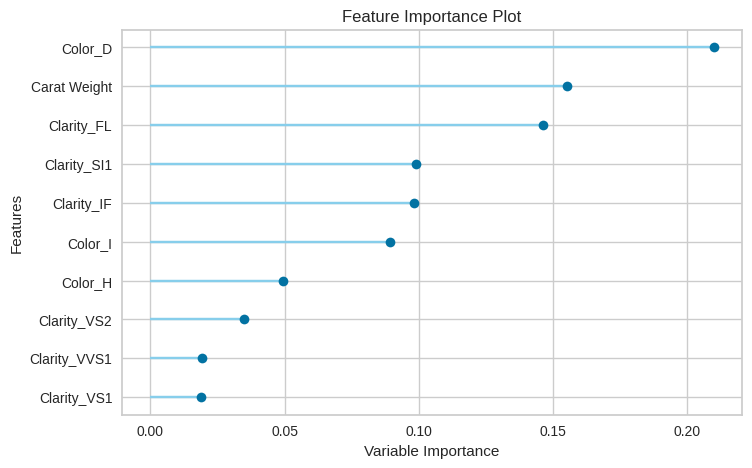

In [ ]:
plot_model(tuned_model, plot='feature')

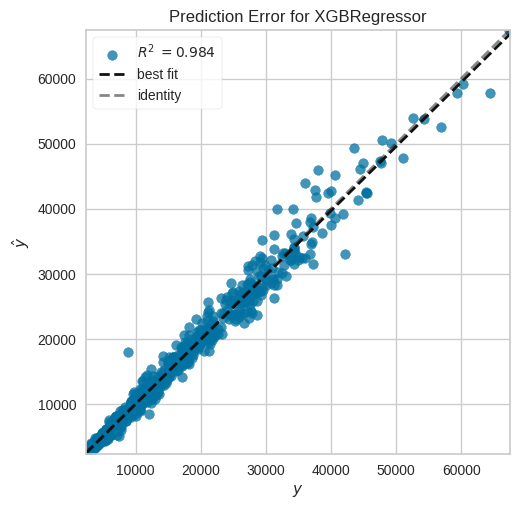

In [ ]:
plot_model(tuned_model, plot = 'error')

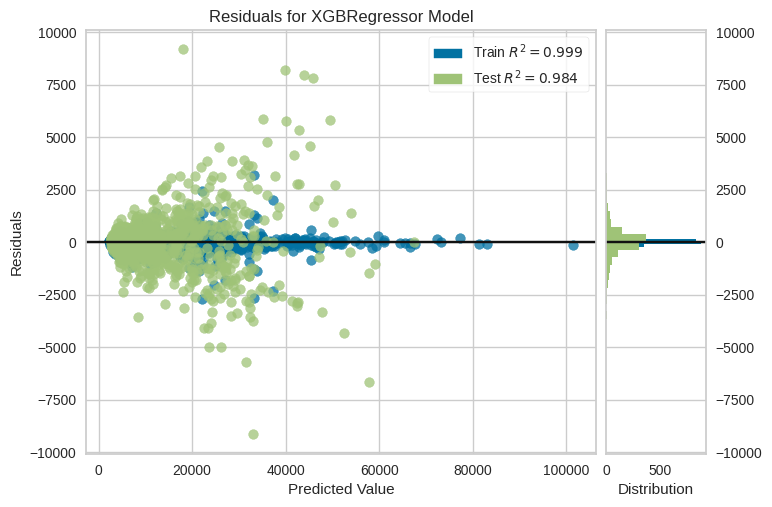

In [ ]:
plot_model(tuned_model)

Um gráfico de resíduos é uma ferramenta poderosa para diagnosticar problemas em um modelo de regressão. Ele traz insights sobre a adequação do modelo, a homoscedasticidade dos erros e a identificação de outliers.

1. **O que é um gráfico de resíduos?**
   - Um gráfico de resíduos representa a diferença (ou resíduo) entre o valor observado e o valor previsto pelo modelo para cada ponto de dado.

2. **Como interpretar um gráfico de resíduos?**

   a. **Padrão Aleatório**:
      - Se os resíduos parecem ser distribuídos aleatoriamente ao redor da linha horizontal do zero, isso é um bom indicativo de que o modelo está adequadamente capturando as informações no dados e que os erros são aleatórios.
   
   b. **Padrões Visíveis**:
      - Se você observar algum padrão nos resíduos (como uma curva), isso indica que o modelo não está capturando alguma informação. Uma solução pode ser considerar uma transformação dos dados ou adicionar variáveis explicativas.
   
   c. **Homoscedasticidade**:
      - Se os resíduos apresentarem uma dispersão constante (homoscedasticidade), isso é um sinal positivo. Se eles apresentarem um formato de funil (heteroscedasticidade), onde os resíduos se espalham mais amplamente em um lado do gráfico, isso é um problema. Modelos de regressão assumem que os erros têm variância constante. A heteroscedasticidade pode ser tratada com transformações (como logarítmica) ou usando modelos que consideram essa característica.
   
   d. **Outliers**:
      - Pontos que estão distantes da linha horizontal do zero podem indicar outliers. Dependendo do contexto, você pode investigar esses pontos para entender por que o modelo está tendo um desempenho ruim neles.
   
   e. **Resíduos vs Ordem de Aquisição**:
      - Quando os resíduos são plotados em relação à ordem de aquisição dos dados (especialmente em séries temporais), padrões ou tendências podem indicar autocorrelação nos resíduos, o que viola uma suposição de modelos de regressão.

3. **Por que é importante?**
   - Os gráficos de resíduos ajudam a diagnosticar problemas nas premissas da regressão.
   - A correção de problemas identificados no gráfico de resíduos pode levar a um modelo mais preciso e confiável.
   


In [26]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Aplicando a predição na base de teste (30%)



In [27]:
# predict_model(tuned_model)

#### Aplicando a predição nos dados não vistos base de 30% reservada para teste

In [28]:
unseen_predictions = predict_model(tuned_model, data=df_test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.2554,0.2554,0.5054,-0.1282,0.3504,0.5500


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label
668,6,98,58,33,190,34.000000,0.430,43,0,0.0
324,2,112,75,32,0,35.700001,0.148,21,0,0.0
624,2,108,64,0,0,30.799999,0.158,21,0,0.0
690,8,107,80,0,0,24.600000,0.856,34,0,0.0
473,7,136,90,0,0,29.900000,0.210,50,0,0.0


In [30]:
#### Salvando modelo (para implantação)

save_model(tuned_model,'/content/drive/MyDrive/PoD Academy/modelos/Diabetes/modelo_diabetes')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                   

In [31]:
#### Lendo modelo implantado

model = load_model('/content/drive/MyDrive/PoD Academy/modelos/Diabetes/modelo_diabetes')
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pregnancies', 'Glucose',
                                             'BloodPressure', 'SkinThickness',
                                             'Insulin', 'BMI',
                                             'DiabetesPedigreeFunction',
                                             'Age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy=...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('trained_model',
                 DecisionTreeRegressor(ccp_alpha=0.0,
                                       criterion='absolute_error', max_depth=12,
                                       max_features=1.0, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0002,
                                       min_samples_leaf=6, min_samples_split=10,
                                       min_weight_fraction_leaf=0.0,
                                       random_state=4715, splitter='best'))],
         verbose=False)

In [32]:
new_prediction = predict_model(model, data=df_test)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.2554,0.2554,0.5054,-0.1282,0.3504,0.5500


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label
668,6,98,58,33,190,34.000000,0.430,43,0,0.0
324,2,112,75,32,0,35.700001,0.148,21,0,0.0
624,2,108,64,0,0,30.799999,0.158,21,0,0.0
690,8,107,80,0,0,24.600000,0.856,34,0,0.0
473,7,136,90,0,0,29.900000,0.210,50,0,0.0


#### Stacking de Modelos

In [33]:
lr = create_model('lr',fold=5)
dt = create_model('dt',fold=5)
rf = create_model('rf',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3537,0.1754,0.4188,0.2257,0.2950,0.5013
1,0.3567,0.1853,0.4304,0.2426,0.2901,0.4670
2,0.3658,0.1810,0.4254,0.1857,0.2975,0.4704
3,0.3606,0.1797,0.4239,0.2654,0.2936,0.4349
4,0.3098,0.1382,0.3717,0.3651,0.2651,0.4043
Mean,0.3493,0.1719,0.4140,0.2569,0.2883,0.4556
Std,0.0202,0.0172,0.0215,0.0600,0.0118,0.0332


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3467,0.3467,0.5888,-0.5306,0.4082,0.5769
1,0.2533,0.2533,0.5033,-0.0356,0.3489,0.3750
2,0.3867,0.3867,0.6218,-0.7400,0.4311,0.3200
3,0.3600,0.3600,0.6000,-0.4717,0.4160,0.5000
4,0.2133,0.2133,0.4619,0.0196,0.3202,0.3333
Mean,0.3120,0.3120,0.5552,-0.3517,0.3849,0.4211
Std,0.0667,0.0667,0.0616,0.2949,0.0427,0.1006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3347,0.1923,0.4385,0.1511,0.3093,0.4723
1,0.3307,0.1800,0.4242,0.2643,0.2863,0.4859
2,0.3553,0.1776,0.4214,0.2009,0.3032,0.4468
3,0.3265,0.1652,0.4064,0.3248,0.2842,0.4125
4,0.2563,0.1175,0.3428,0.4598,0.2462,0.3312
Mean,0.3207,0.1665,0.4067,0.2802,0.2858,0.4298
Std,0.0337,0.0259,0.0335,0.1072,0.0220,0.0552


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
stacked_model = stack_models(estimator_list=[lr, dt, rf], meta_model=lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3534,0.1853,0.4305,0.1422,0.3137,0.4233
1,0.3179,0.1610,0.4012,0.3263,0.2699,0.5098
2,0.3479,0.1671,0.4087,0.2820,0.2865,0.4806
3,0.3427,0.1797,0.4239,0.2792,0.2840,0.4436
4,0.3507,0.1591,0.3988,0.2267,0.2878,0.5017
5,0.3673,0.1980,0.4449,0.1787,0.2958,0.5028
6,0.3258,0.1597,0.3996,0.3376,0.2761,0.4384
7,0.3586,0.1796,0.4238,0.2551,0.2973,0.4127
8,0.2600,0.1204,0.3470,0.4506,0.2448,0.3457


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacked_model

StackingRegressor(cv=5,
                  estimators=[('Linear Regression',
                               LinearRegression(n_jobs=-1)),
                              ('Decision Tree Regressor',
                               DecisionTreeRegressor(random_state=183)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=183))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

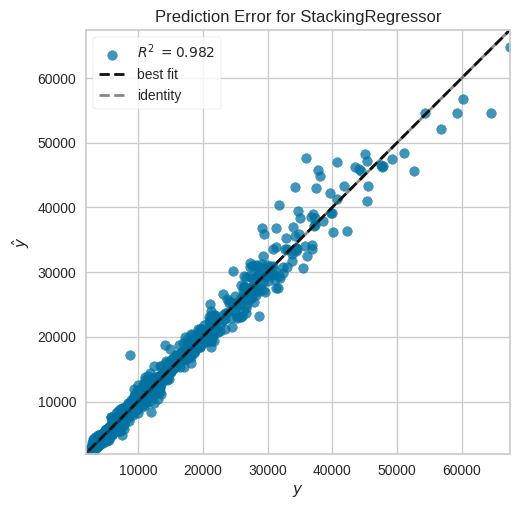

In [ ]:
plot_model(stacked_model, plot = 'error')

In [ ]:
evaluate_model(stacked_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
unseen_predictions = predict_model(stacked_model, data=df_test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,744.4942,1623994.9810,1274.3606,0.9849,0.0876,0.0673


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
1782,1.58,Ideal,H,VS2,EX,VG,GIA,11419,12609.380144
3917,1.63,Ideal,G,VS1,EX,EX,GIA,16241,16518.434342
221,1.33,Ideal,G,VVS2,EX,EX,GIA,12345,11948.527045
2135,1.06,Very Good,I,SI1,VG,EX,GIA,4507,4311.305596
5224,1.01,Very Good,H,VVS2,EX,VG,GIA,5908,6432.310230
